In [1]:
import pandas as pd
import numpy as np
#import sys
#sys.path.append("../ram_code/")
import Auto_Timeseries_Final as AT

C:\ProgramData\Anaconda3\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\ProgramData\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
C:\ProgramData\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.TXA6YQSD3GCQQC22GEQ54J2UDCXDXHWN.gfortran-win_amd64.dll
  stacklevel=1)


Imported Auto_Timeseries version: 0.0.11. Call by using Auto_Timeseries(trainfile, ts_column,
                            sep=',', target=None, score_type='rmse', forecast_period=2,
                            timeinterval='Month', non_seasonal_pdq=None, seasonality=False,
                            seasonal_period=12, seasonal_PDQ=None,
                            verbose=0)
    To get detailed charts of actuals and forecasts, set verbose = 1


In [2]:
datapath = 'C:/Users/Ram/Documents/Ram/data_sets/'
#datapath = ''
filename1 = 'AEP_hourly.csv'
#filename2 = 'test.csv'

In [4]:
train = pd.read_csv(datapath+filename1,index_col=None)
print(train.shape)
train.head(1)

(121273, 2)


,Datetime,AEP_MW
0,2004-12-31 01:00:00,13478.0


In [5]:
#dft = dft.iloc[::48,]
dft = train[:1000]
print(dft.shape)
dft.head(1)

(1000, 2)


,Datetime,AEP_MW
0,2004-12-31 01:00:00,13478.0


In [6]:
ts_column = 'Datetime'
sep = ','
target = 'AEP_MW'
dft[[ts_column,target]].isnull().sum()

Datetime    0
AEP_MW      0
dtype: int64

In [7]:
score_type = 'rmse'
forecast_period = 5
timeinterval = 'Hourly'
non_seasonal_pdq = (3,1,3)
seasonality = True
seasonal_periods = 24

Dataframe given as input. Analyzing Time Series data...
    Target variable = AEP_MW
Time Interval is given as Hourly

Running Facebook Prophet Model...


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


    Fit-Predict data (shape=(1000, 2)) with Confidence Interval = 0.95...
Building Forecast dataframe. Forecast Period = 5


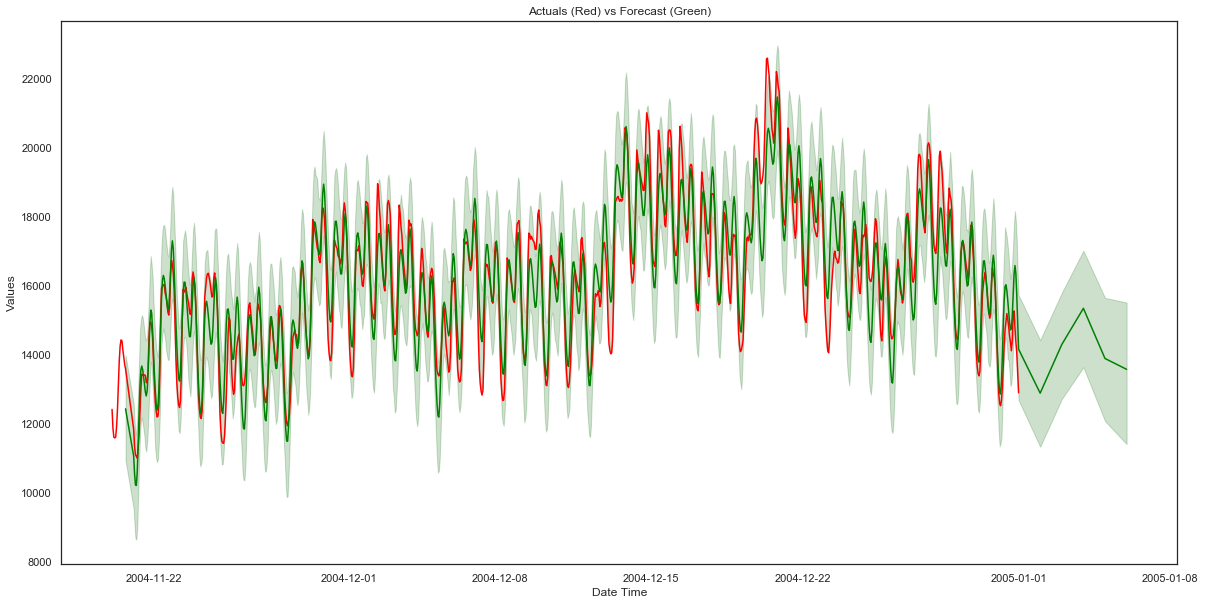

    RMSE = 786.46
    Std Deviation of Originals = 2,112.43
    Normalized RMSE = 37%

Best Model is:
    FB_Prophet
    Best Model Score: 786.46


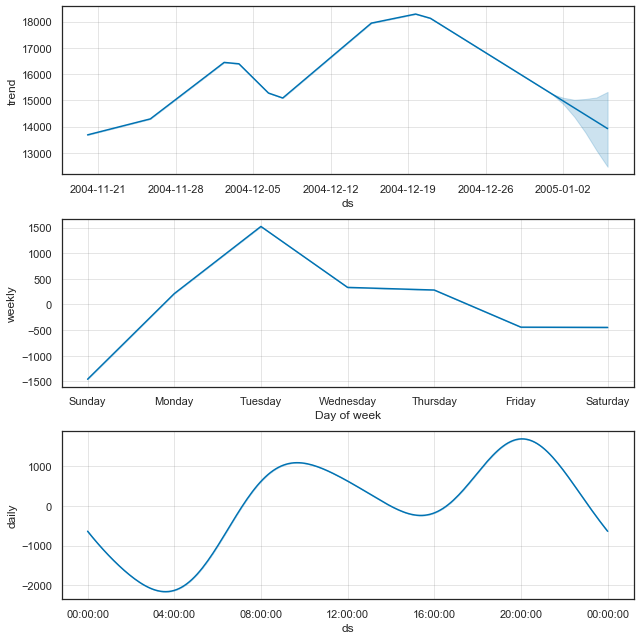

In [8]:
mldict = AT.Auto_Timeseries(dft, ts_column,
                            sep, target, score_type, forecast_period,
                            timeinterval, non_seasonal_pdq, seasonality=seasonality,
                            seasonal_period=seasonal_periods, seasonal_PDQ=None, conf_int=0.95, 
                            model_type="prophet", 
                            verbose=1)